In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn

Define transform to convert the PIL images to tensors and normalize them to the range [-1, 1].

In [33]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

Define the batch size.

In [24]:
batch_size = 4

Load the training and test datasets.

In [36]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Visualize some of the training images.

torch.Size([4, 3, 32, 32])
torch.Size([3, 36, 138])
(3, 36, 138)
(36, 138, 3)


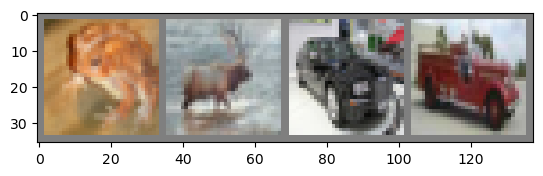

frog  deer  car   truck


In [37]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    print(img.size())
    npimg = img.numpy()
    print(npimg.shape)
    npimg = np.transpose(npimg, (1, 2, 0))
    print(npimg.shape)
    plt.imshow(npimg)
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.size())

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


Build model

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

class NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = [
            nn.Linear(32*32, 512),
            nn.ReLU(),
            nn.Linear(512, 512).
            nn.ReLU(),
            nn.Linear(512, len(classes))
        ]
        
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
    
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        

Define optimization loop

Evaluate model